# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# k-means algorithm

In [7]:

def Centroids(X,centroids):  
  K = len(centroids)  #Number of centroids

  
  idx = np.zeros((len(X),1))  # empty dataframe

  
  num = len(X) # Number of example 

  for i in range(0,num):

    
      k = 0  #points for centroid
      min_ = 0

      while k < K:
        
        temp = ((X.iloc[i,:] - centroids.iloc[k,:])**2).sum()

        if (min_ > temp or k == 0):
          min_ = temp
          idx[i,0] = k

        k = k + 1

  return idx

def calculateCentroids(X,idx,K):

  (m,n) = X.shape

  centroids = np.zeros((K,n))

 
  k = 0  #Pointers

  while k < K:

    centroids[k,:] = X.iloc[idx==k,:].mean()

    k = k + 1

  centroids = pd.DataFrame(centroids, columns = X.columns)
  return centroids

def Kmeans(X, initial_centroids, max_iters):

  
  (m,n) = X.shape; # Initialize values

  
  K = len(initial_centroids)# No of clusters

 
  centroids = initial_centroids;  # Create temporary variables
  previous_centroids = centroids;

  
  idx = np.zeros((len(X),1)) # Assignment array

  for i in range(1,max_iters):

    idx = Centroids(X,centroids)
    previous_centroids = centroids

    centroids = calculateCentroids(X,idx,K)

  return [centroids,idx]

def InitializeCentroid(X,K):

  return X.sample(n=K, random_state=1)


# Elbow Method Algorithm

In [8]:
def kMeansElbow(X, K_range, num_iters):
    
    distortions = []
    
    for K in K_range:
        
        # Initialize centroids
        centroids = InitializeCentroid(X, K)
        
        # Run K-means algorithm
        for i in range(num_iters):
            idx = Centroids(X, centroids)
            centroids = calculateCentroids(X, idx, K)
        
        # Calculate distortion
        distortion = 0
        for i in range(K):
            X_k = X[idx==i]
            centroid_k = centroids.iloc[i,:]
            distortion += ((X_k - centroid_k)**2).sum().sum()
        distortions.append(distortion)
    
    return distortions


# Importing Dataset

In [10]:
X = pd.read_csv('https://raw.githubusercontent.com/ParjitaMunshi/ADS-7390-Assignment1-KMeans/main/Alcohol_consumtion.csv')
X

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


# Check the null value percentage in dataset

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

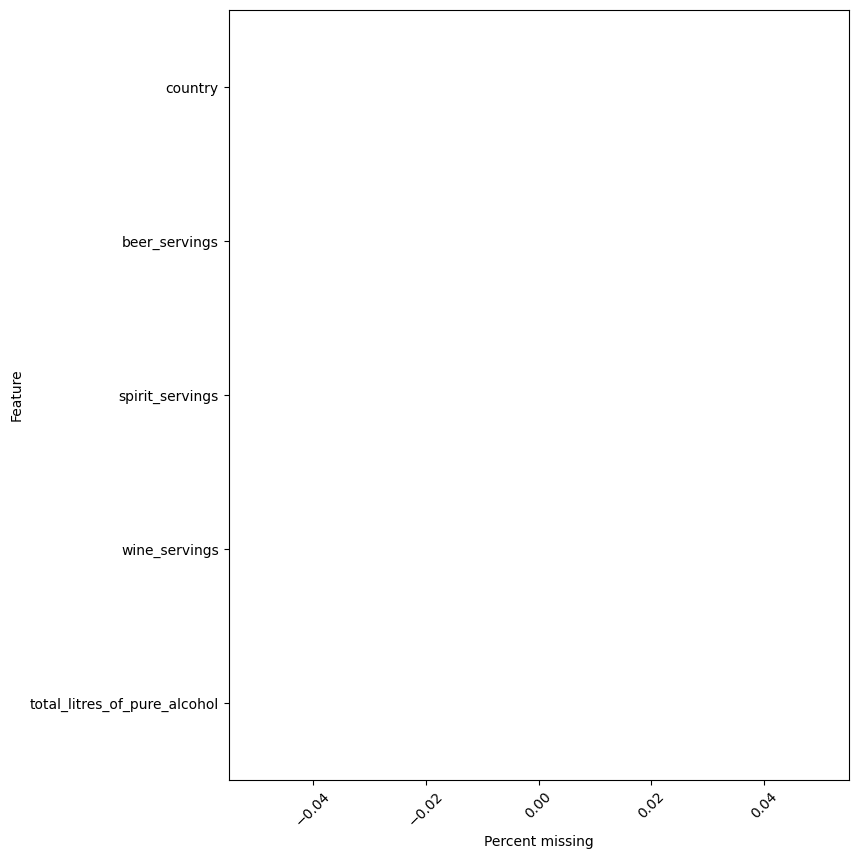

In [11]:
null_vals = X.isnull().sum()/len(X)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

# Check the duplicates and if precent any then drop that

In [12]:
X = X.drop_duplicates()
print(X.shape)
X.head(2)

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9


# Label Encoding for converting the Categorical data into  Numeric Data

In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['country']= label_encoder.fit_transform(X['country'])
  
X['country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  41,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  42,  43,  44,  45, 127,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 157, 111, 140, 141, 142,
       160, 161, 162, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 158, 159, 163, 164, 165, 166, 167, 168, 169,
       171,  99, 172, 173, 174, 175, 176, 177, 178, 179, 181, 18

In [14]:
X.info() #information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    int32  
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 8.3 KB


In [15]:
X.describe() #description of dataset

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,96.000000,106.160622,80.994819,49.450777,4.717098
std,55.858452,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,56.000000,8.000000,4.200000
75%,144.000000,188.000000,128.000000,59.000000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


# K-means for K = 2

In [16]:
k = 2 

In [17]:
init_centroids = InitializeCentroid(X,k)
[centroids,idx] = Kmeans(X,init_centroids,10)

# Plot the scatterplot for k = 2

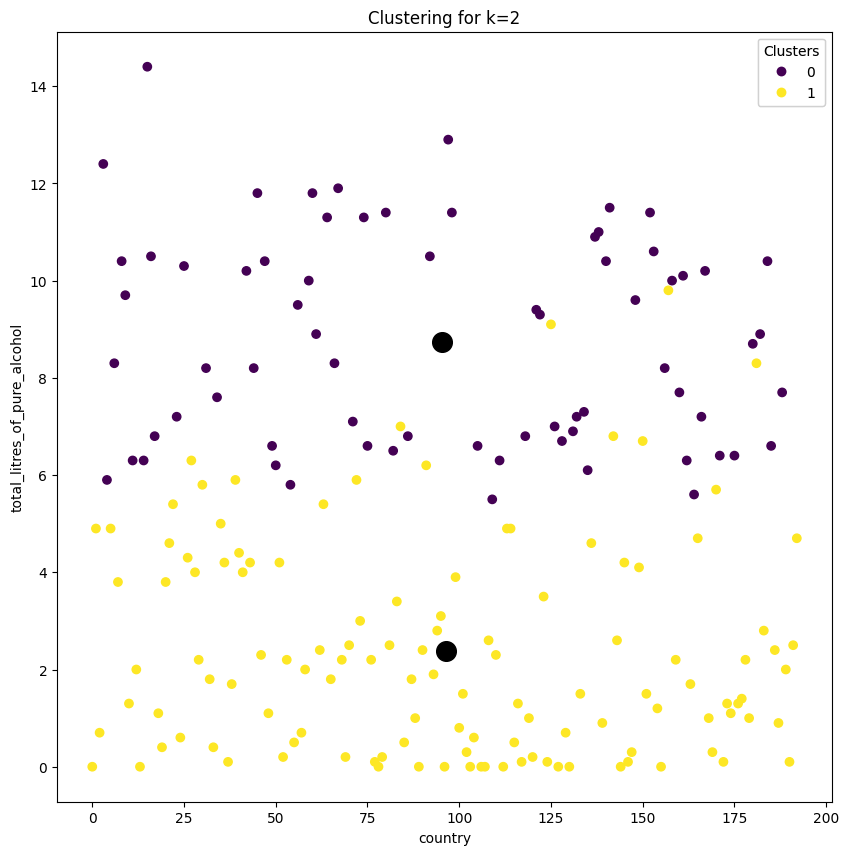

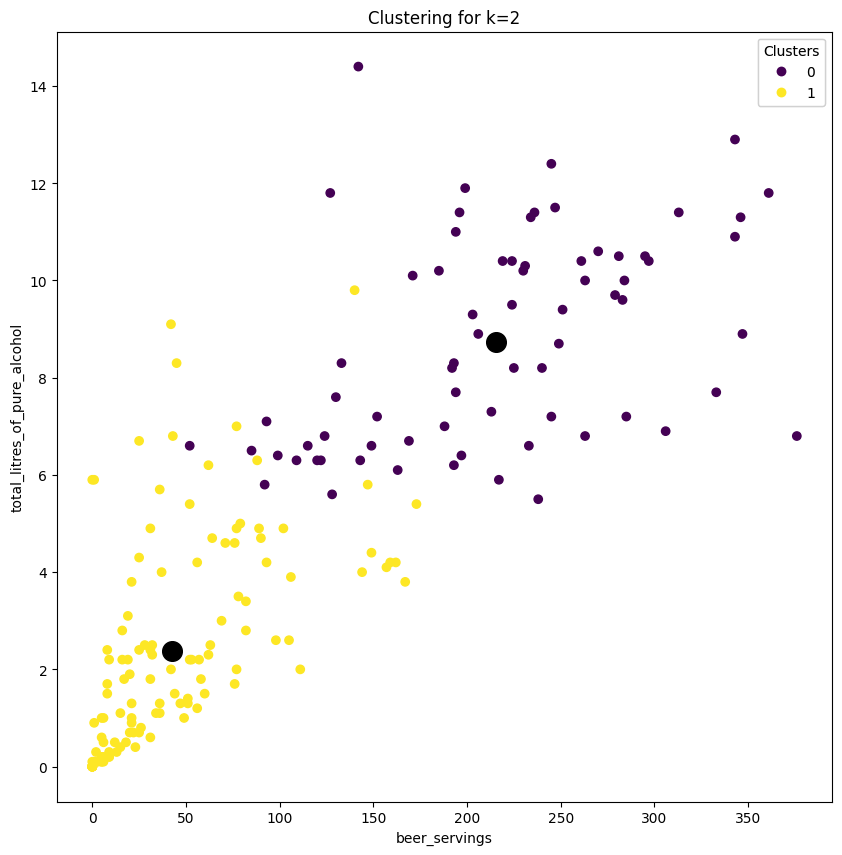

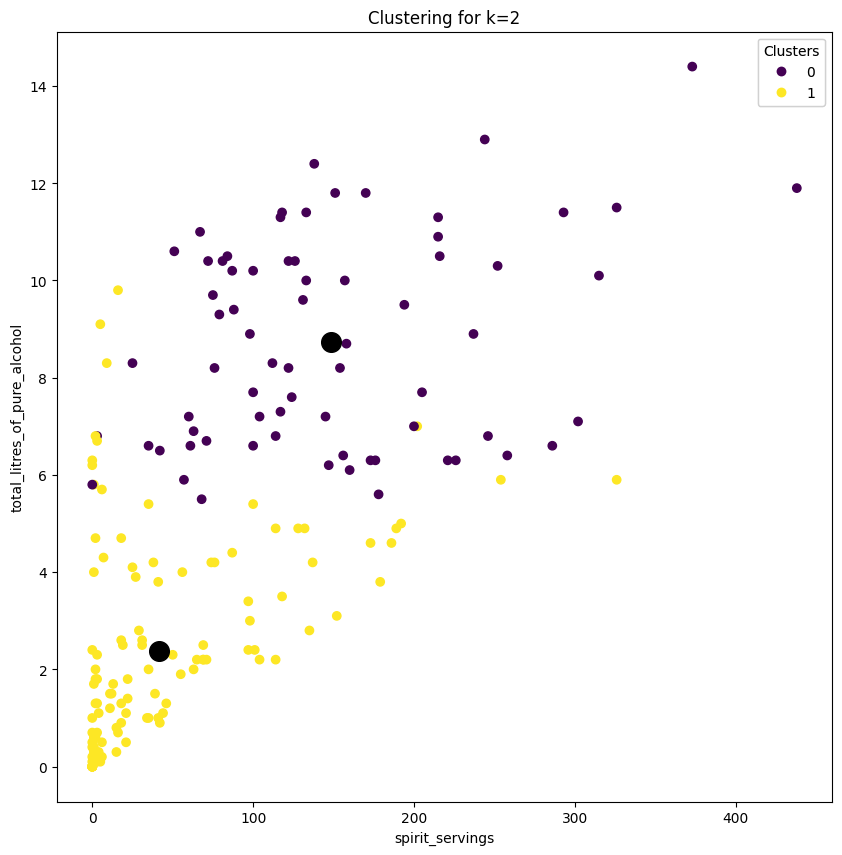

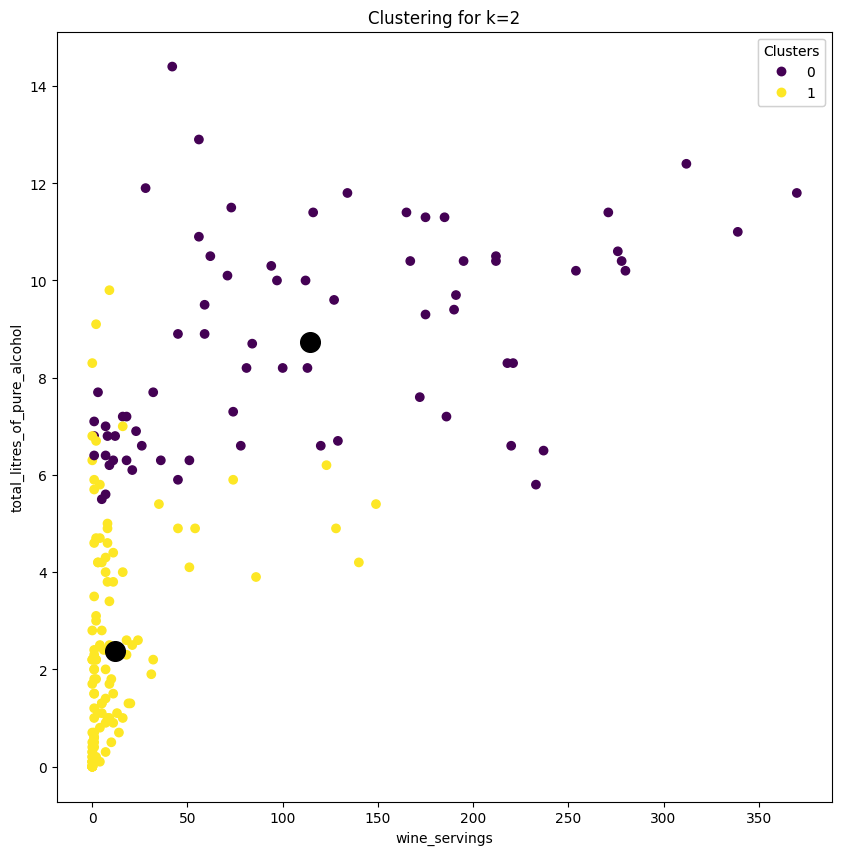

In [18]:
#plot for column country and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['country'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['country'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=2')
plt.xlabel('country')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column beer_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['beer_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['beer_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=2')
plt.xlabel('beer_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column spirit_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['spirit_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['spirit_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=2')
plt.xlabel('spirit_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

#plot for column wine_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['wine_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['wine_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=2')
plt.xlabel('wine_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

# K-means for K = 3

In [19]:
k = 3

In [20]:
init_centroids = InitializeCentroid(X,k)
[centroids,idx] = Kmeans(X,init_centroids,10)

# Plot the scatterplot for k = 3

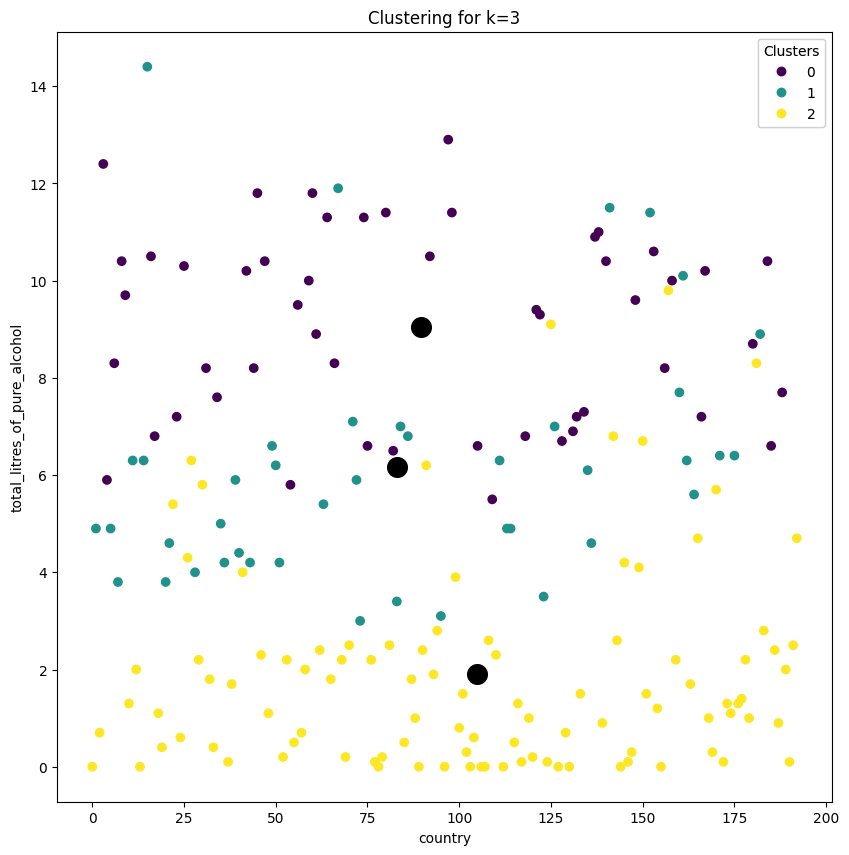

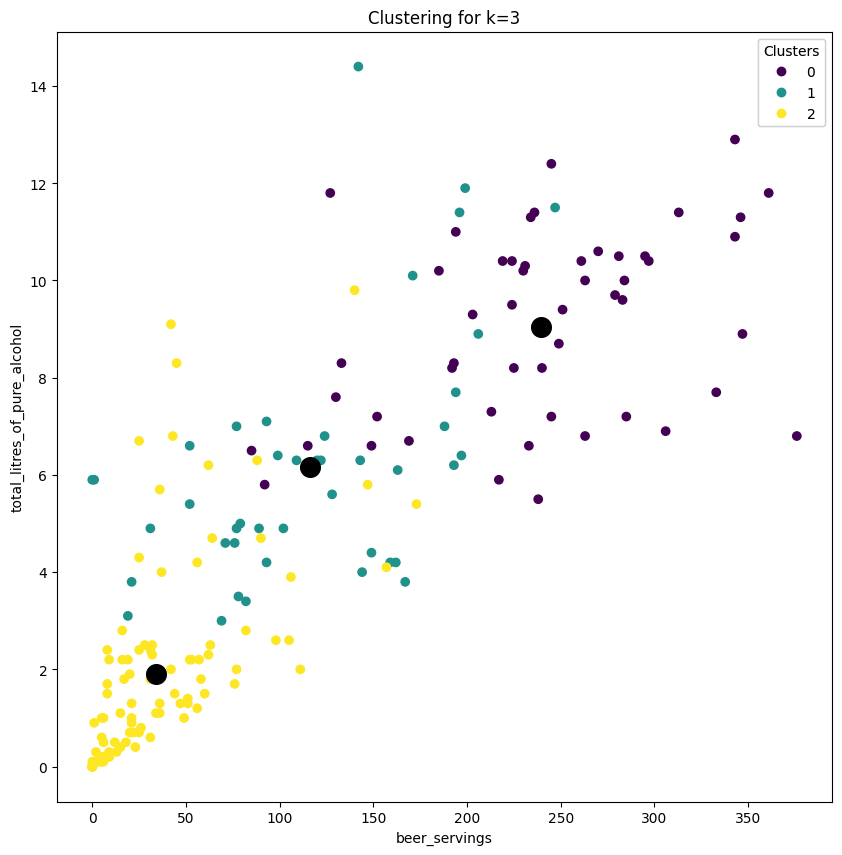

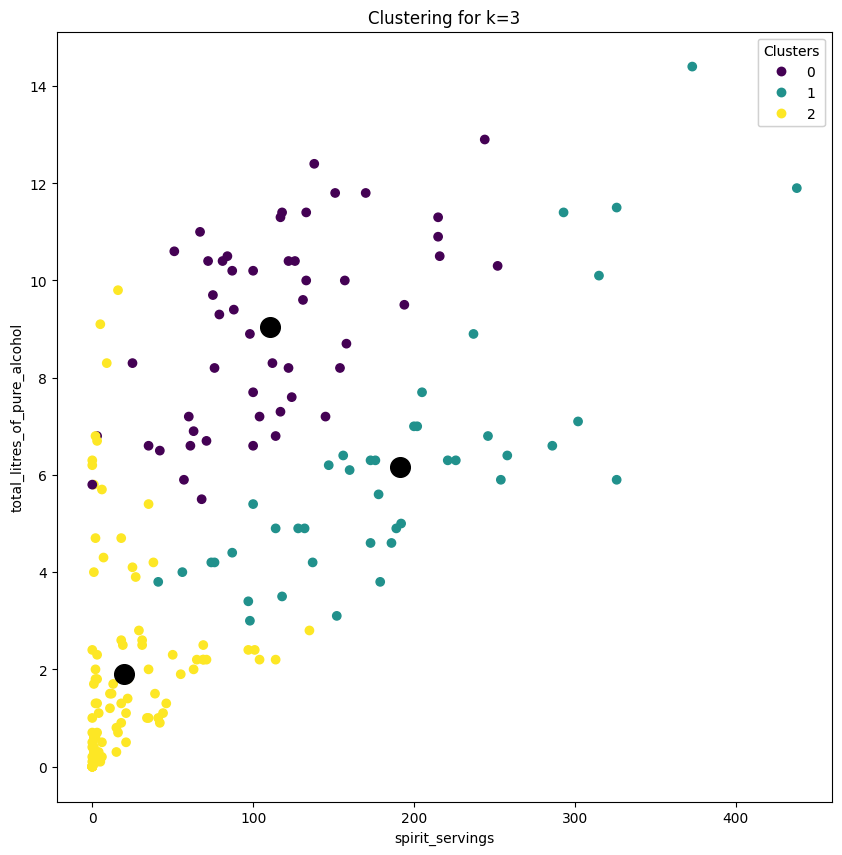

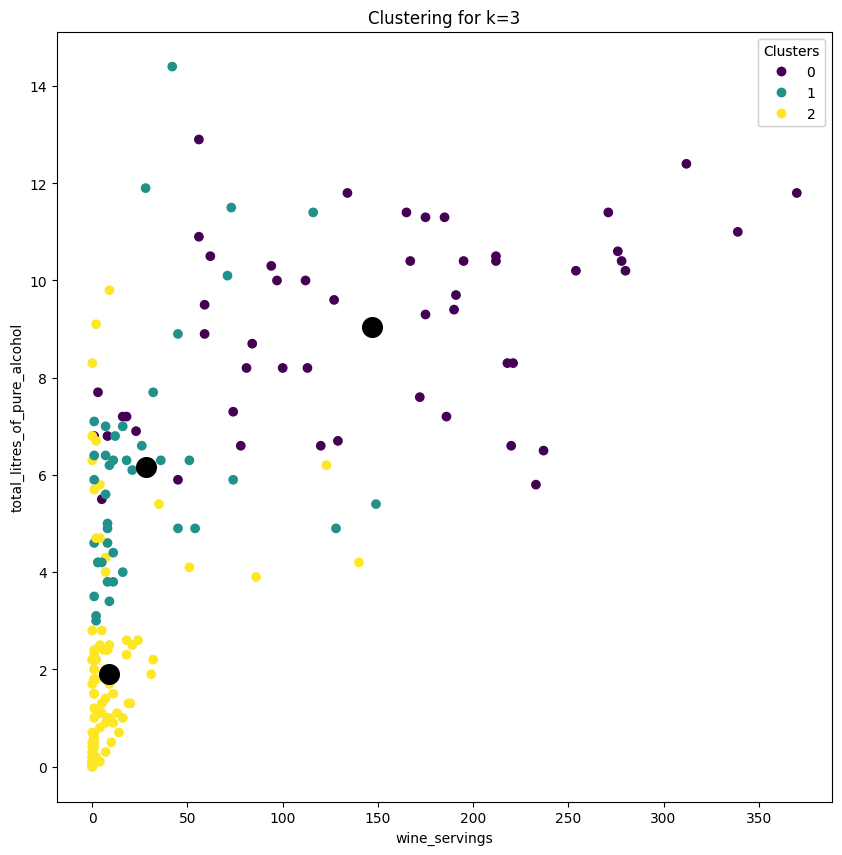

In [21]:
#plot for column country and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['country'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['country'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=3')
plt.xlabel('country')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column beer_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['beer_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['beer_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=3')
plt.xlabel('beer_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column spirit_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['spirit_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['spirit_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=3')
plt.xlabel('spirit_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

#plot for column wine_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['wine_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['wine_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=3')
plt.xlabel('wine_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

# K-means for K = 4

In [22]:
k = 4

In [23]:
init_centroids = InitializeCentroid(X,k)
[centroids,idx] = Kmeans(X,init_centroids,10)

# Plot the scatterplot for k = 4

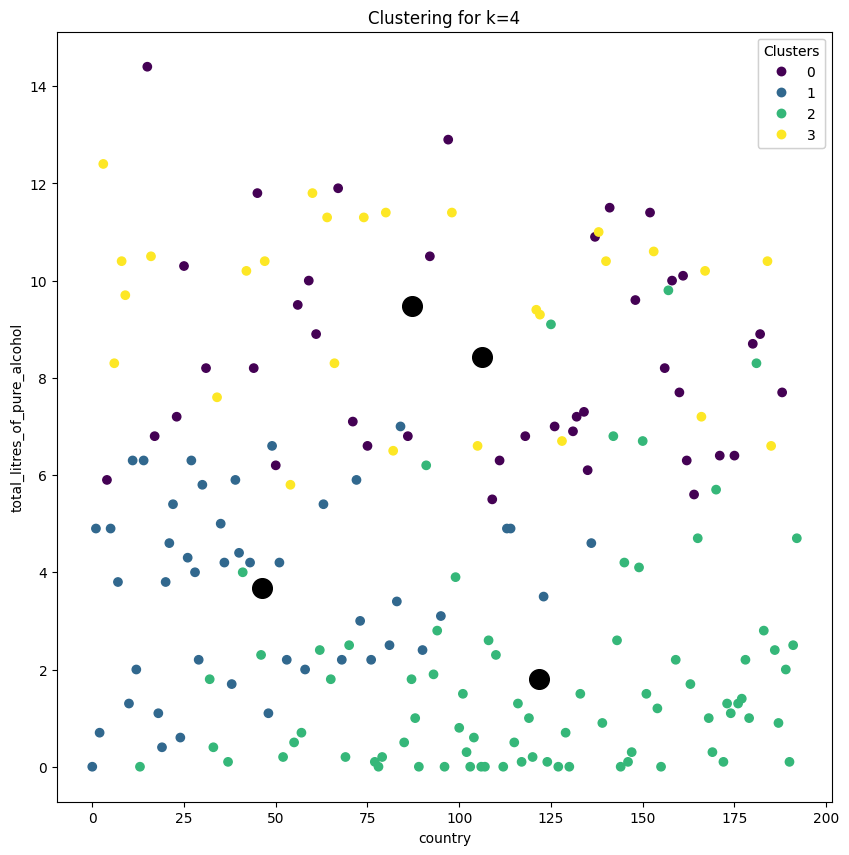

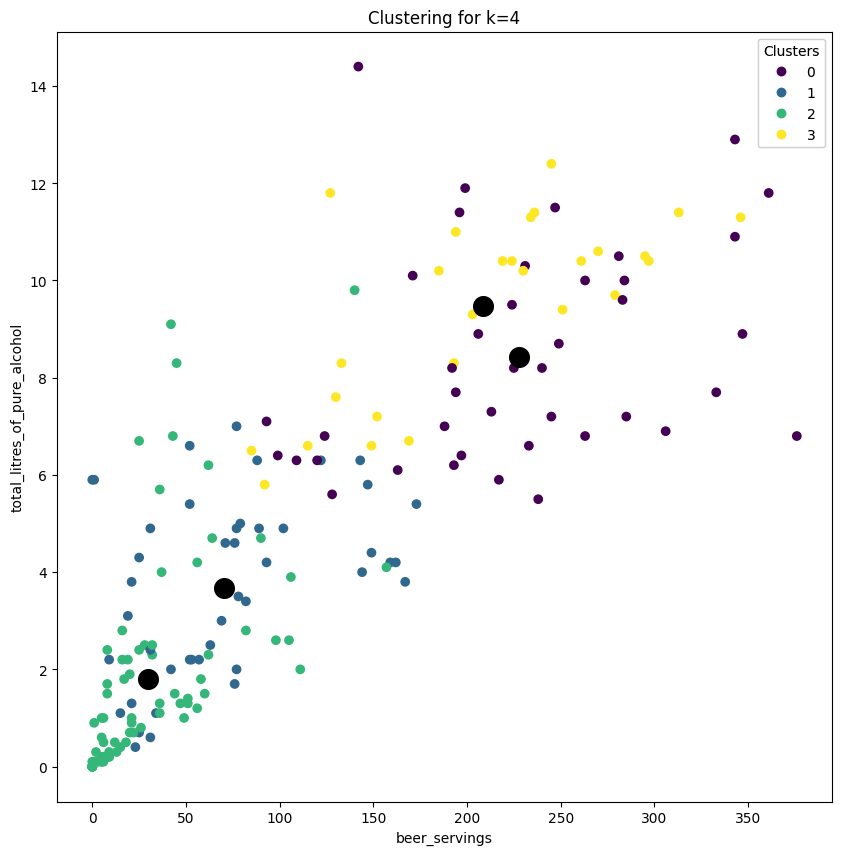

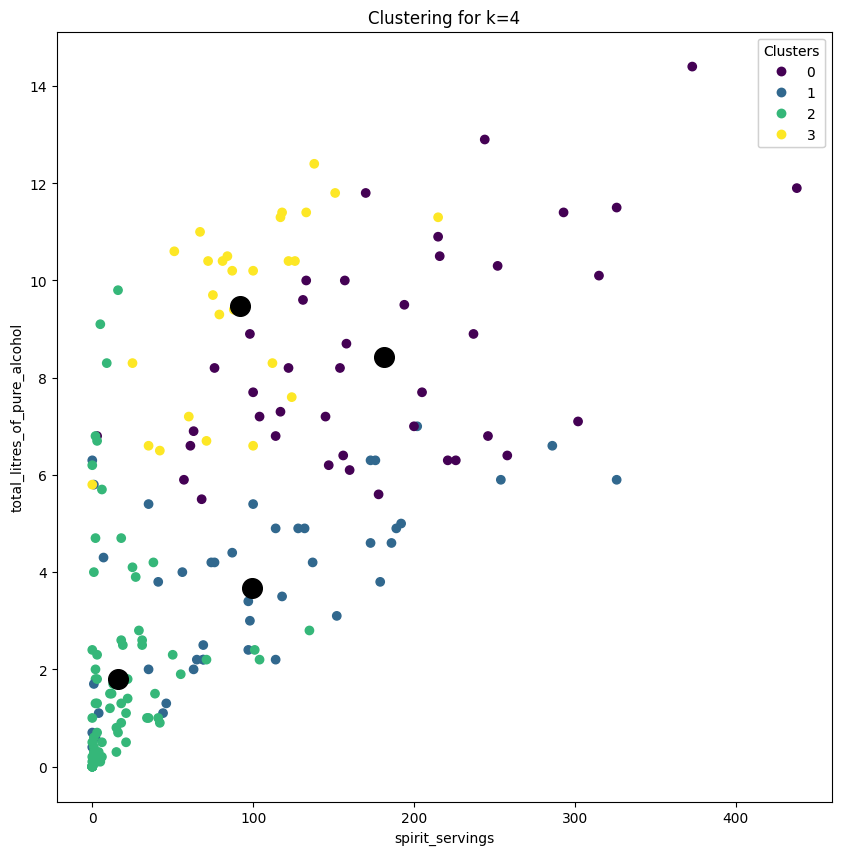

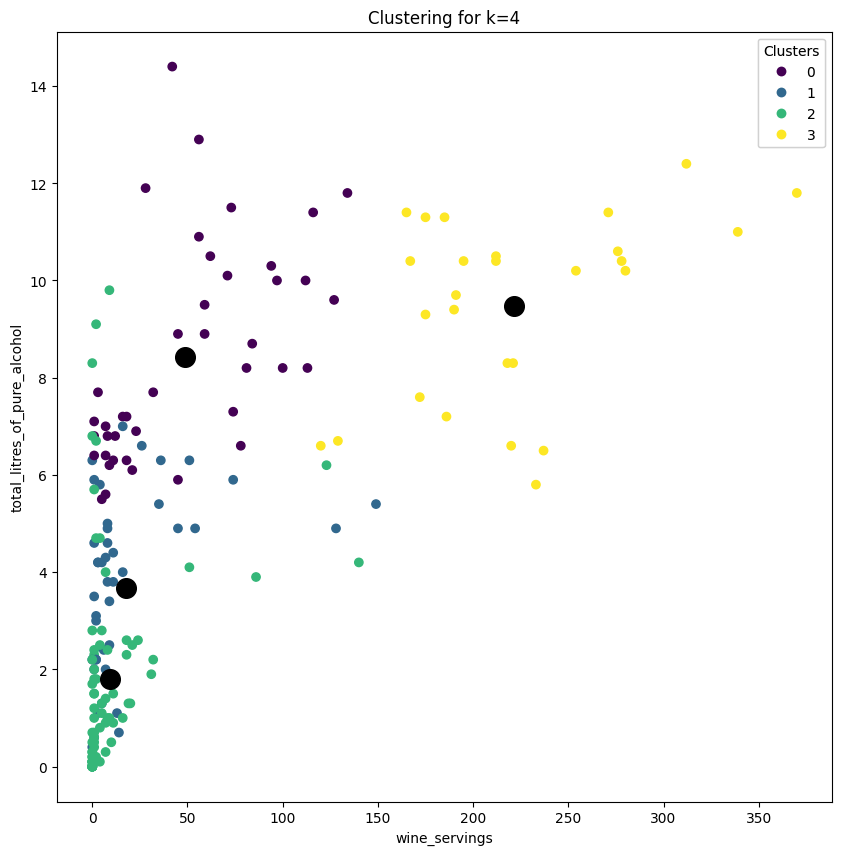

In [24]:
#plot for column country and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['country'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['country'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=4')
plt.xlabel('country')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column beer_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['beer_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['beer_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=4')
plt.xlabel('beer_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()


#plot for column spirit_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['spirit_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['spirit_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=4')
plt.xlabel('spirit_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

#plot for column wine_servings and total_liters of pure alcohol

fig, ax = plt.subplots(figsize=(10, 10))

scatter = ax.scatter(X['wine_servings'], X['total_litres_of_pure_alcohol'], c=idx)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.scatter(centroids['wine_servings'],centroids['total_litres_of_pure_alcohol'],c = "black", s=200)
plt.title('Clustering for k=4')
plt.xlabel('wine_servings')
plt.ylabel('total_litres_of_pure_alcohol')
plt.show()

# Elbow method

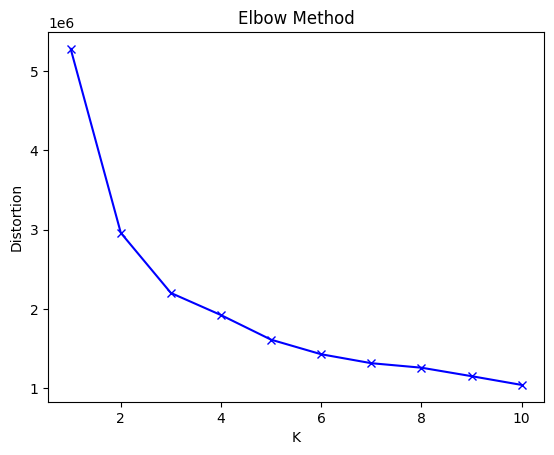

In [25]:
K_range = range(1, 11)
distortions = kMeansElbow(X, K_range, 10)

import matplotlib.pyplot as plt   
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()
